# 📊**Porter: NN Regression Business Case**

## 📝 **Metadata**

**Notebook Title:** Porter: NN Regression Business Case  
**Author:** Vishnu Vineeth P M

**Date Created:** March 2025   
**Tools Used:** Python, Scikit-learn, TensorFlow/Keras
**Objective:** To build a regression model using neural networks, evaluate its performance, and provide insights for optimizing delivery operations.

# 📈 Introduction

**Porter**, India's largest marketplace for intra-city logistics, is revolutionizing the delivery sector with technology-driven solutions.
This case focuses on leveraging neural networks to accurately predict delivery
times, a critical aspect of customer satisfaction in logistics.
- With a dataset encompassing various aspects of orders and deliveries, Porter
aims to refine its delivery time estimations.
- Analyzing this dataset can provide significant insights into delivery dynamics, efficiency bottlenecks, and optimization opportunities.
- The insights obtained can enhance Porter's operational efficiency, ensuring
timely deliveries and improving driver-partner allocation

# Problem statement

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

As a data scientist at Porter, the task is to analyze the dataset to accurately predict delivery times for different orders. The primary goal is to build a regression model using neural networks, evaluate its performance, and provide insights for optimizing delivery operations.

# **Column Profiling**

---


| Column Name   | Description                                    | Data Type |
| ------------- | ---------------------------------------------- | --------- |
| **market_id** | Identifier for the market where the order was placed. | `float64`  |
| **created_at** | Timestamp of when the order was placed.    | `object` |
| **actual_delivery_time** | Timestamp of when the order was delivered.| `object` |
| **store_id** | Unique identifier for the store fulfilling the order.    | `object` |
| **store_primary_category**  |The category of the store (e.g., American, Mexican). | `object` |
| **order_protocol**|Numeric code representing the mode of order placement            | `float64` |
| **total_items** | Total number of items in the order. | `int64` |
| **subtotal** | The subtotal cost of the order.    | `int64` |
| **num_distinct_items**    | Count of different items in the order   | `int64`   |
| **min_item_price**    | Price of the least expensive item in the order   | `int64`   |
| **max_item_price**    | Price of the most expensive item in the order.  | `int64`   |
| **total_onshift_partners**    | Number of delivery partners available at the time.   | `float64`   |
| **total_busy_partners**    | Number of delivery partners currently busy.   | `float64`   |
| **total_outstanding_orders**    | Number of outstanding orders at that moment. | `float64`   |


---

# 📚**Importing necessary libraries**

In [60]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

# 📥*Understand the Data*

In [4]:
#loading the dataset
df = pd.read_csv("dataset.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [5]:
#checking the basic informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [6]:
#shape of the data
df.shape

(197428, 14)

In [7]:
print(f"The number of rows in the dataset is {df.shape[0]}")
print(f"The number of features in the dataset is {df.shape[1]}")

The number of rows in the dataset is 197428
The number of features in the dataset is 14


In [8]:
#starting date and ending date
print(f" The starting date is {df['created_at'].min()} and ending date is {df['created_at'].max()} ")

 The starting date is 2014-10-19 05:24:15 and ending date is 2015-02-18 06:00:44 


In [9]:
#number of unique market_ids
print(df["market_id"].nunique())
print(df["market_id"].unique())
print(df["market_id"].dtype)

6
[ 1.  2.  3.  4. nan  5.  6.]
float64


There are a total of 6 unique market_ids, which are in a float format. But we have to change it to the object format.

In [10]:
#checking the value counts of market ids
df["market_id"].value_counts()

market_id
2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: count, dtype: int64

Market id 2 has most number of orders

In [11]:
#checking the value counts of Order protocol
df["order_protocol"].value_counts()

order_protocol
1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: count, dtype: int64

## Data Preprocessing and Feature Engineering

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

We have to change the data types of "created_at" and "actual_delivery_time" into datetime.

In [13]:
#changing the data types of  "created_at" and "actual_delivery_time" into datetime.
cols = ["created_at", "actual_delivery_time"]
for col in cols :
    df[col] = pd.to_datetime(df[col])

Changing "market_id" and "order_protocol" to category

In [14]:
df["market_id"] = df["market_id"].astype("category")
df["order_protocol"] = df["order_protocol"].astype("category")

In [15]:
#Creating the target variable

df["delivery_time"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()/60

In [16]:
#creating order hour and order week
df["order_hour"] = df["created_at"].dt.hour
df["order_day_of_week"] = df["created_at"].dt.dayofweek

In [17]:
#naming the day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['order_day_name'] = df['order_day_of_week'].map(day_names)

In [18]:
#missing values percentages
round(df.isna().sum()/df.shape[0] * 100, 2)

market_id                   0.50
created_at                  0.00
actual_delivery_time        0.00
store_id                    0.00
store_primary_category      2.41
order_protocol              0.50
total_items                 0.00
subtotal                    0.00
num_distinct_items          0.00
min_item_price              0.00
max_item_price              0.00
total_onshift_partners      8.24
total_busy_partners         8.24
total_outstanding_orders    8.24
delivery_time               0.00
order_hour                  0.00
order_day_of_week           0.00
order_day_name              0.00
dtype: float64

There are missing values in the dataset. We can drop the null values because our dataset it comparitively large

In [19]:
df.dropna(inplace = True)

In [20]:
df.shape

(176248, 18)

In [21]:
df.head(3)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_hour,order_day_of_week,order_day_name
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4,Friday
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1,Tuesday
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0,Monday


In [22]:
num_cols = ["total_items", "subtotal", "num_distinct_items", "min_item_price", "max_item_price", 
            "total_onshift_partners", "total_busy_partners", "total_outstanding_orders", "delivery_time"]

# 📊 🔍*Exploratory Data Analysis (EDA)*

In [23]:
#let us see during what hour most number of orders were placed
order_frequency = df["order_hour"].value_counts().sort_index()

peak_hours = order_frequency.idxmax()
peak_order_count = order_frequency.max()
print(order_frequency)
print(f"The most number of order were placed between {peak_hours} and {peak_hours+1} with order count {peak_order_count}")

order_hour
0     11466
1     25734
2     32940
3     23719
4     13254
5      6079
6      1223
7         9
8         2
14       39
15      504
16     1945
17     3071
18     4546
19    12214
20    14014
21    10274
22     7877
23     7338
Name: count, dtype: int64
The most number of order were placed between 2 and 3 with order count 32940


In [24]:
#let us see during which day most number of orders were placed
number_of_orders_by_day = df["order_day_name"].value_counts()
peak_days = number_of_orders_by_day.idxmax()
peak_order_count = number_of_orders_by_day.max()
print(number_of_orders_by_day)
print(f"On {peak_days} the most number of orders were placed, with {peak_order_count} number of orders")

order_day_name
Saturday     30858
Sunday       29898
Friday       25012
Monday       24202
Thursday     22997
Wednesday    21796
Tuesday      21485
Name: count, dtype: int64
On Saturday the most number of orders were placed, with 30858 number of orders


**Insights**
- It is evidently visible that during Saturdays and Sundays most number of orders were placed. During weekends there is a significant increase in the order placements.
- During 1 to 3 'O' clock most number of orders were placed

In [25]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
created_at,176248,2015-02-04 19:35:43.333773824,2015-01-21 15:22:03,2015-01-29 01:37:01.500000,2015-02-05 02:30:12.500000,2015-02-12 00:52:58.249999872,2015-02-18 06:00:44,NaN
actual_delivery_time,176248,2015-02-04 20:23:29.186373632,2015-01-21 16:16:34,2015-01-29 02:24:29,2015-02-05 03:31:58,2015-02-12 01:35:34,2015-02-19 22:45:31,NaN
total_items,176248.0,3.204592,1.0,2.0,3.0,4.0,411.0,2.673899
subtotal,176248.0,2696.498939,0.0,1408.0,2221.0,3407.0,26800.0,1828.922584
num_distinct_items,176248.0,2.674589,1.0,1.0,2.0,3.0,20.0,1.625558
min_item_price,176248.0,684.93773,-86.0,299.0,595.0,942.0,14700.0,519.911425
max_item_price,176248.0,1159.886994,0.0,799.0,1095.0,1395.0,14700.0,560.78451
total_onshift_partners,176248.0,44.905276,-4.0,17.0,37.0,65.0,171.0,34.529394
total_busy_partners,176248.0,41.845434,-5.0,15.0,35.0,62.0,154.0,32.154573
total_outstanding_orders,176248.0,58.2068,-6.0,17.0,41.0,85.0,285.0,52.708344


## 📊 Visual Analysis

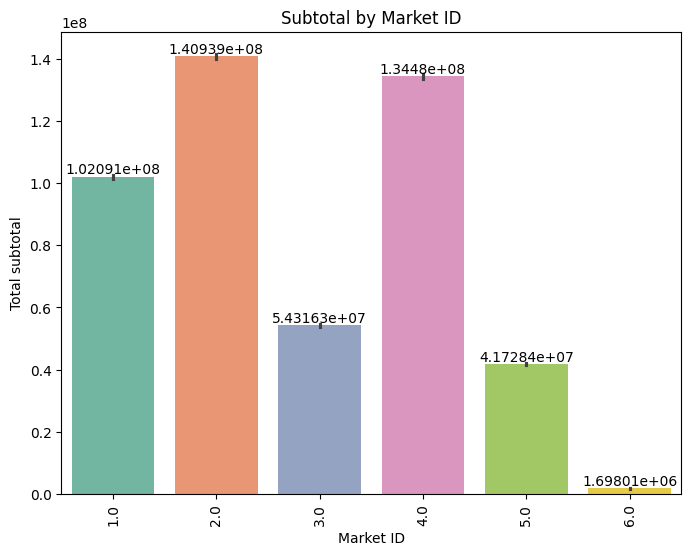

In [26]:
#Market ID vs subtotal
plt.figure(figsize=(8, 6))
ax = sns.barplot(data = df,x="market_id", y = "subtotal",estimator = 'sum', palette="Set2")
plt.xlabel('Market ID')
plt.xticks(rotation = 90)
plt.ylabel('Total subtotal')
plt.title('Subtotal by Market ID')
# Add count values on top of each bar
for i in ax.containers :
    ax.bar_label(i)
plt.show()

**Insights**

Market ID 2 seems to be the major market

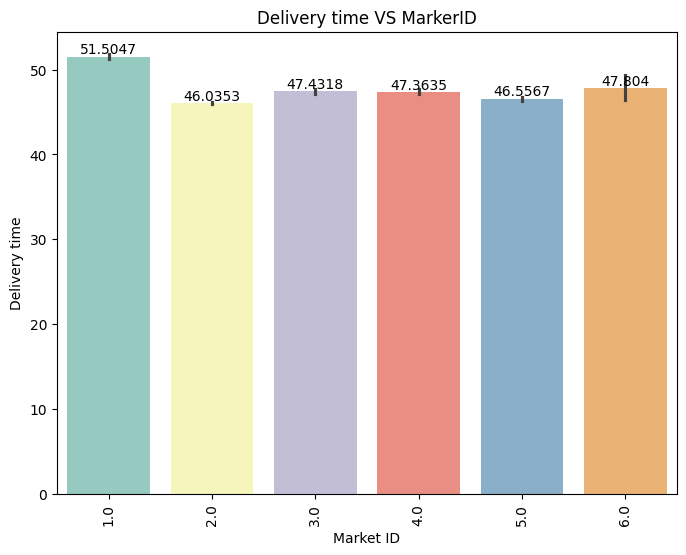

In [27]:
#Market ID vs Subtotal

plt.figure(figsize=(8, 6))
ax = sns.barplot(data = df,x="market_id", y = "delivery_time", palette="Set3")
plt.xlabel('Market ID')
plt.xticks(rotation = 90)
plt.ylabel('Delivery time')
plt.title('Delivery time VS MarkerID')
# Add count values on top of each bar
for i in ax.containers :
    ax.bar_label(i)
plt.show()

**Insights**

- Delivery time for all the market seems to be almost same except for the market ID 1
- MarketID 2 seems to be the best delivering the item

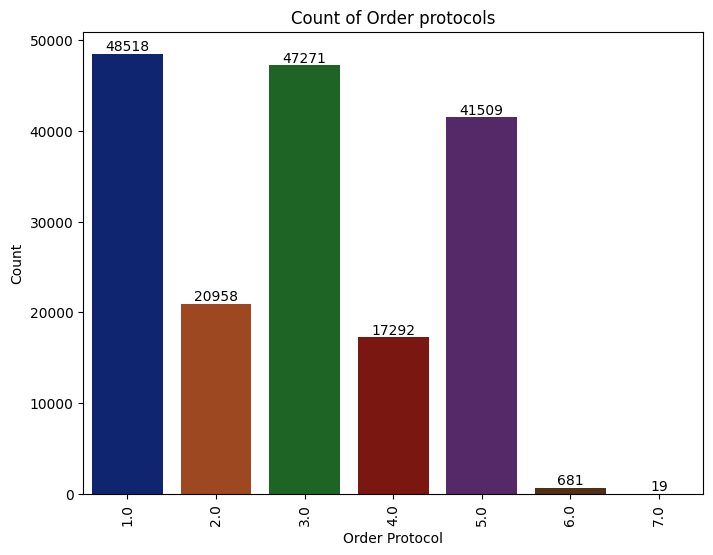

In [28]:
#countplot of Order Protocal
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df,x='order_protocol', palette = "dark")
plt.xlabel('Order Protocol')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Count of Order protocols')
# Add count values on top of each bar
for i in ax.containers :
    ax.bar_label(i)
plt.show()

**Insights**

The first type of Order protocol is used more

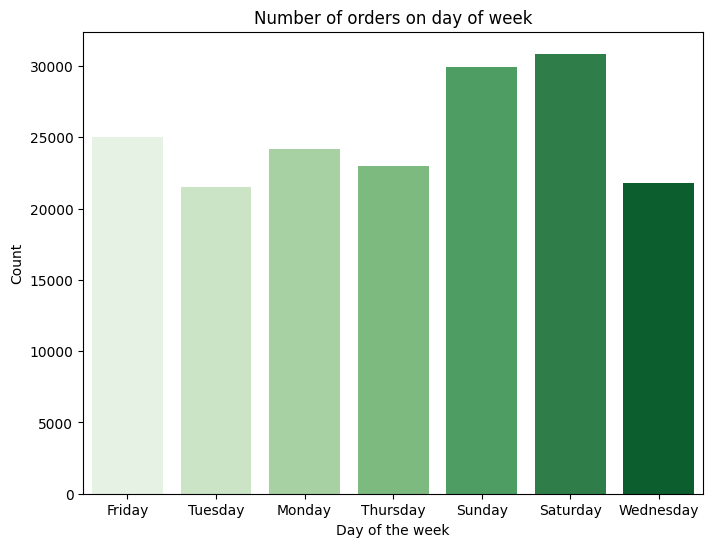

In [29]:
#order day of week count
plt.figure(figsize = (8,6))
ax = sns.countplot(data = df, x = "order_day_name", palette = "Greens")
plt.xlabel("Day of the week")
plt.ylabel("Count")
plt.title("Number of orders on day of week")
plt.show()

**Insights**
- During weekends more number of orders have been placed compared to the working days

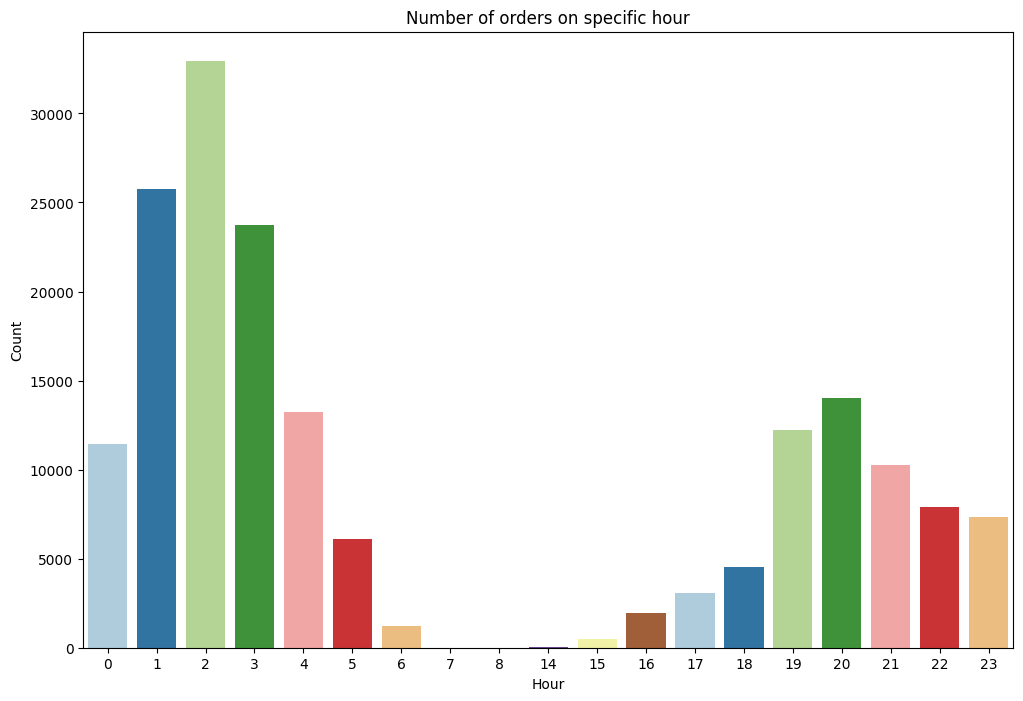

In [30]:
#countplot of the hour
plt.figure(figsize = (12,8))
ax = sns.countplot(data = df, x = "order_hour", palette = "Paired")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Number of orders on specific hour")
plt.show()

**Insights**

It is evident that during 2 PM most number of orders have been placed

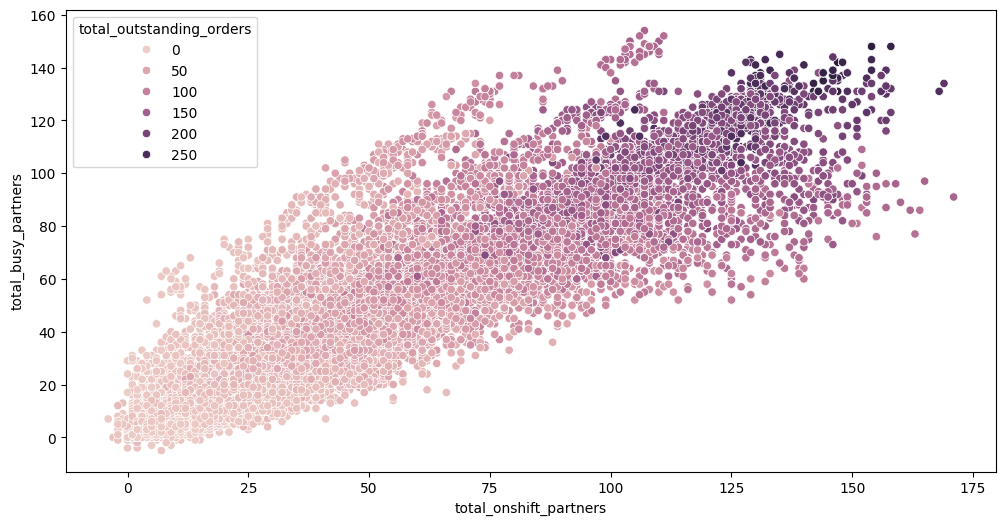

In [31]:
#scatterplot between total_onshift_partners and total_busy_partners
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="total_onshift_partners", y="total_busy_partners", hue="total_outstanding_orders")
plt.show()

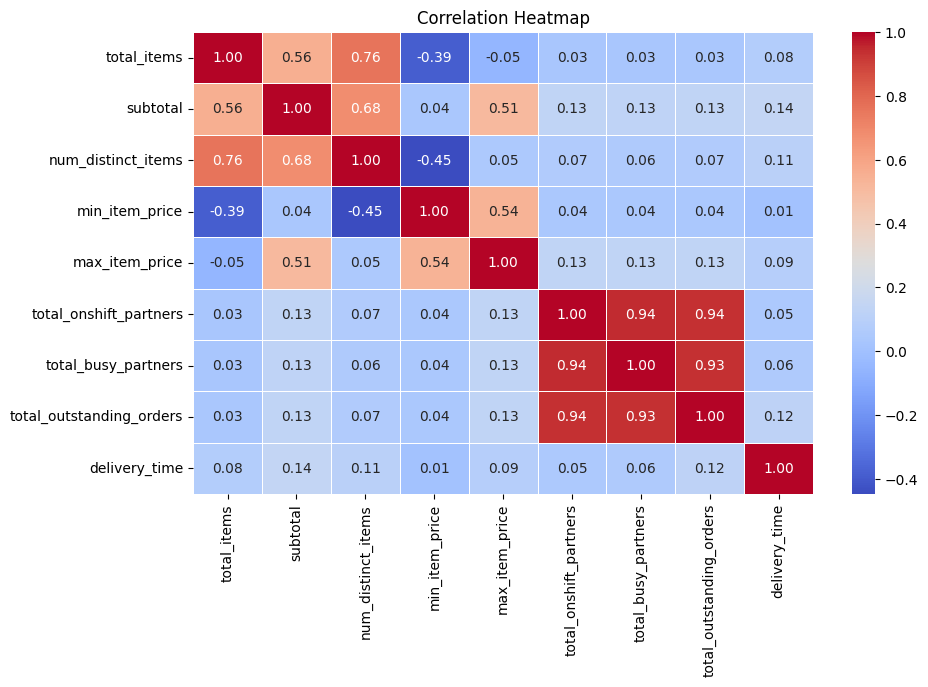

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Insights**
1. #### Highly Correlated Features: ####

    - total_onshift_partners, total_busy_partners, and total_outstanding_orders are highly correlated (0.93 - 0.94).
        - This suggests that as the number of on-shift partners increases, so do the busy partners and outstanding orders.
        - Possible redundancy: If one feature is included, others might be redundant in predictive modeling.
    - total_items and num_distinct_items have a strong correlation (0.76).
        - More total items in an order likely mean more distinct items are included.
    - subtotal and num_distinct_items (0.68)
        - Higher num_distinct_items typically means a higher order subtotal.
2. ####  Negative Correlations:

    - num_distinct_items and min_item_price (-0.45)
        - More distinct items in an order correlate with lower-priced items, possibly due to bulk orders including cheaper items.
    - total_items and min_item_price (-0.39)
        - Large orders tend to have lower individual item prices, suggesting bulk purchases of lower-priced items.
3. #### Delivery Time Weakly Correlated:

    - delivery_time has weak correlations with all features (max ~0.14).
        - This suggests that delivery time is not strongly influenced by total items, subtotal, or number of partners.
        - However, a slight positive correlation (0.12) with total outstanding orders might suggest a small increase in delivery time whenoutstanding orders rise.

<Figure size 1200x600 with 0 Axes>

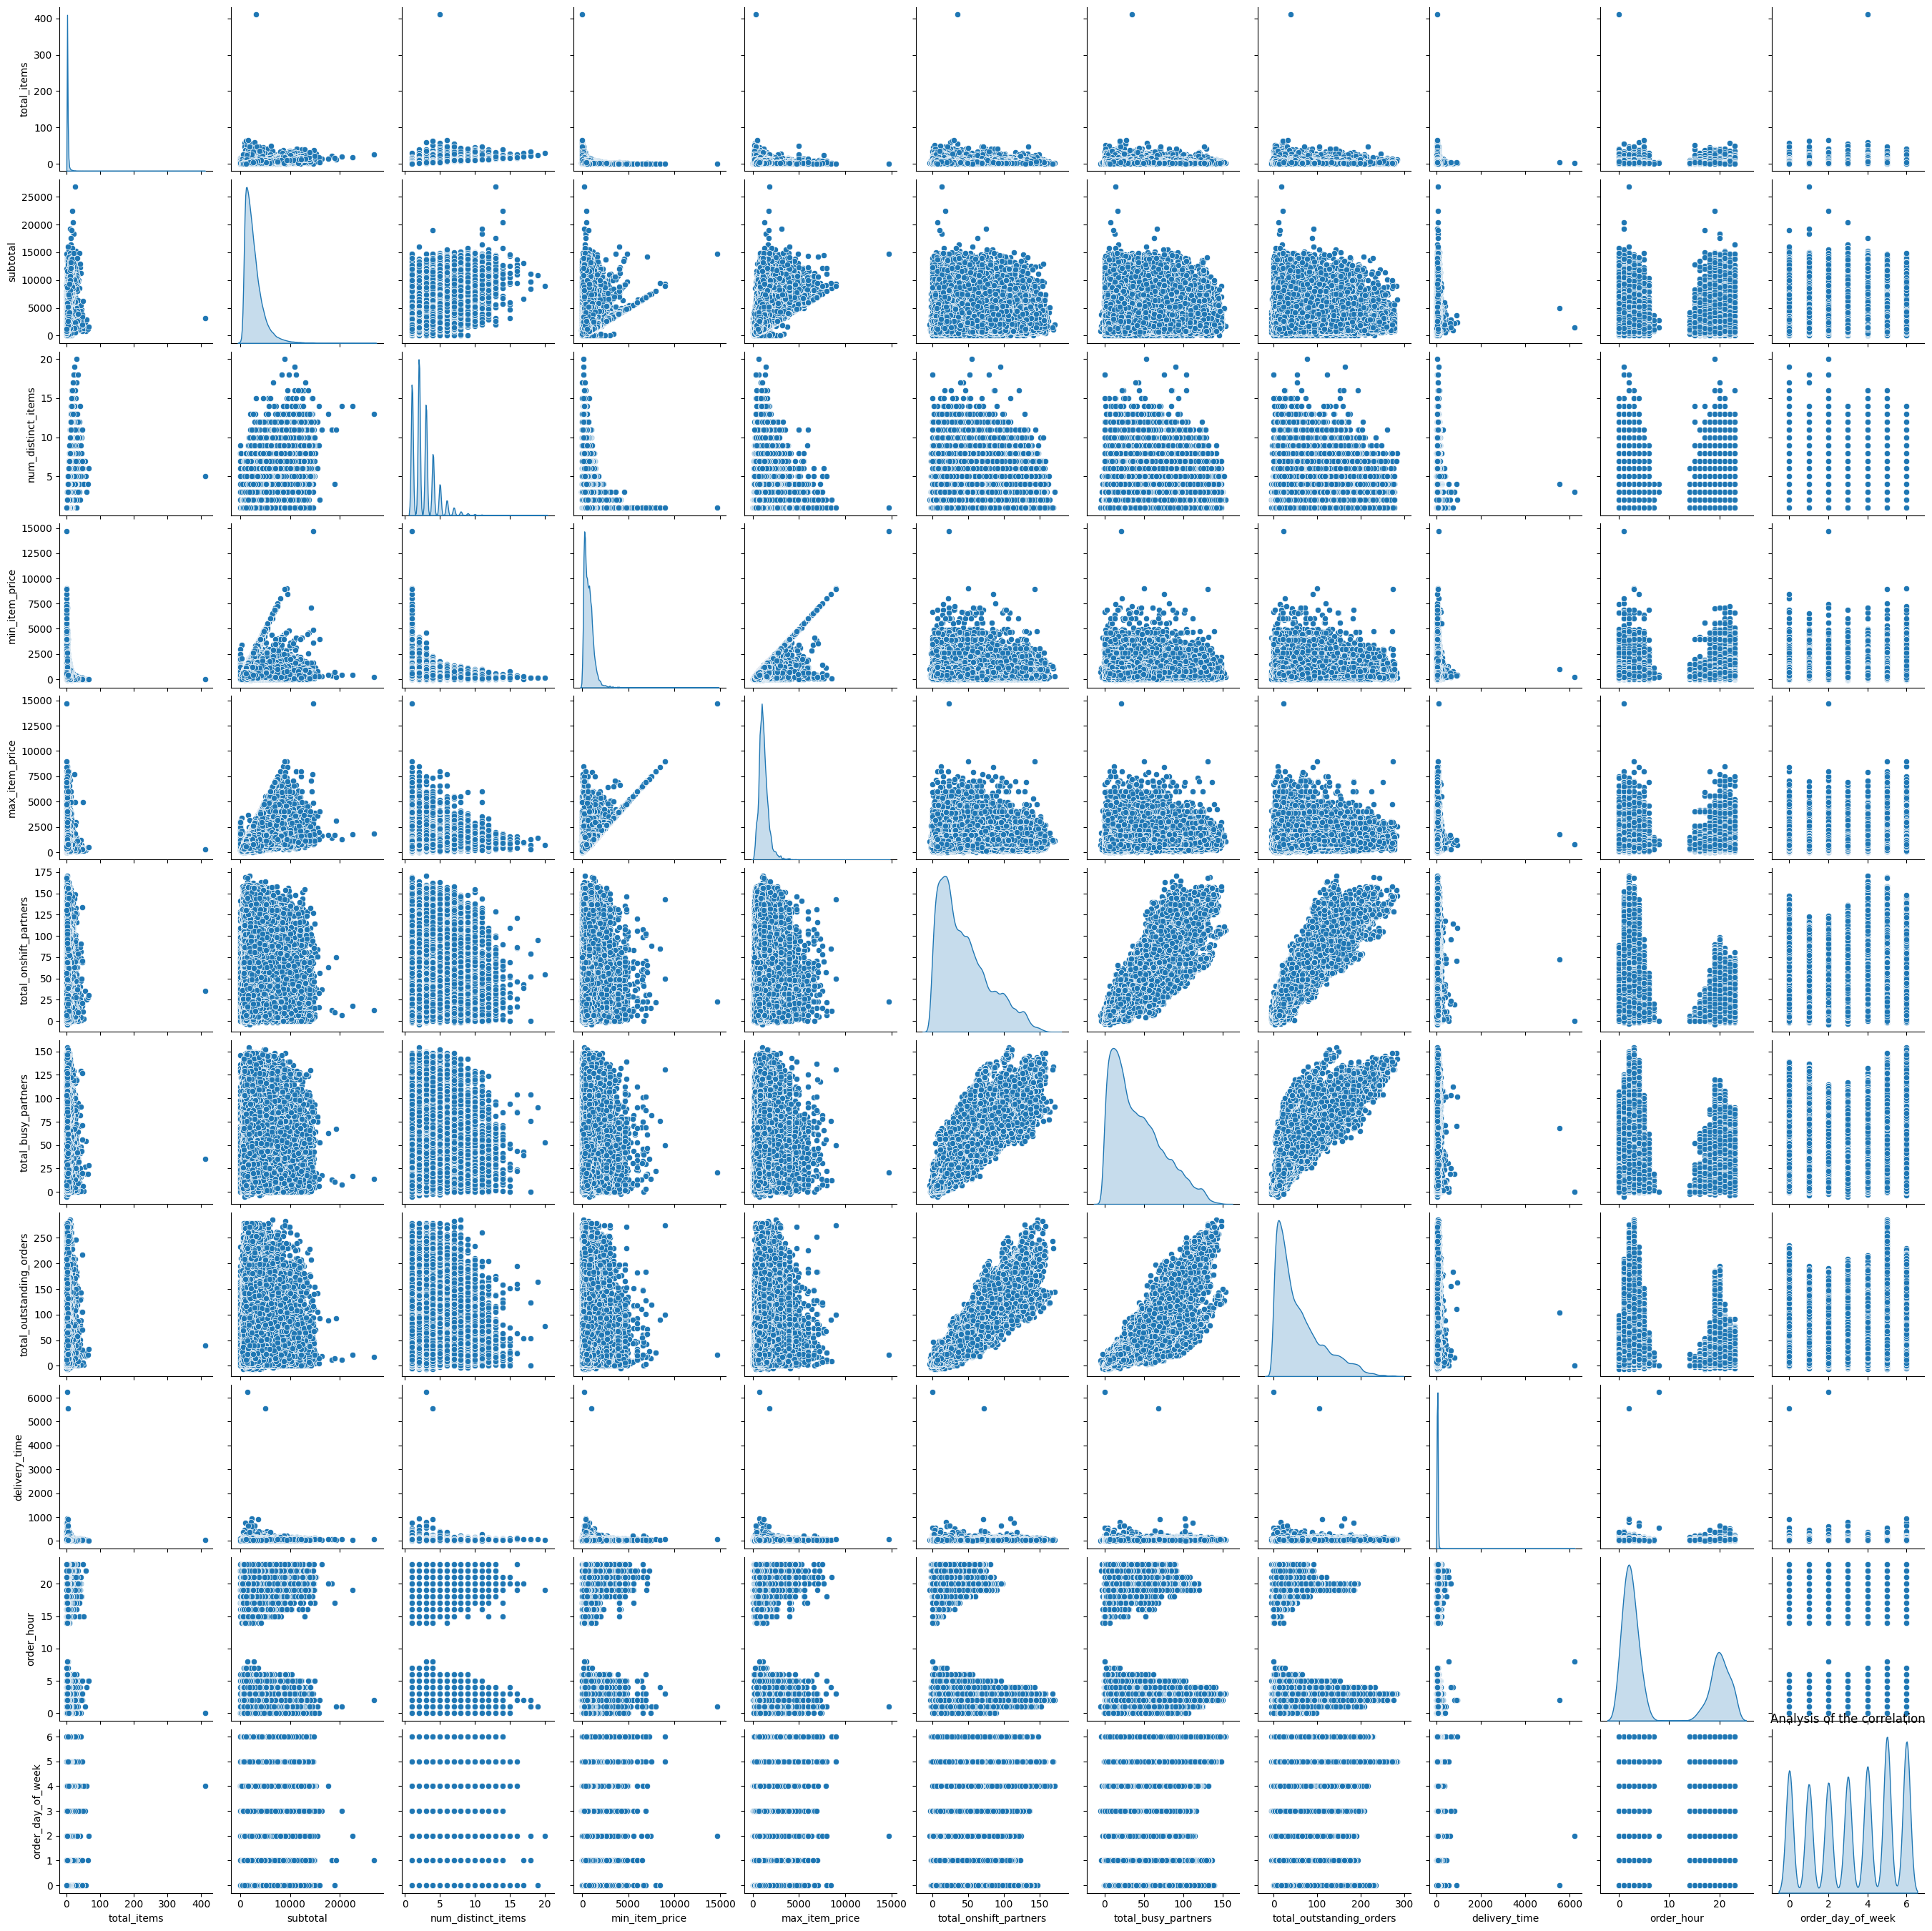

In [33]:
#visualizing a pairplot
plt.figure(figsize=(12, 6))
sns.pairplot(df, diag_kind="kde")
plt.title('Analysis of the correlation')
plt.show()

## Outlier detection

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176248 non-null  category      
 1   created_at                176248 non-null  datetime64[ns]
 2   actual_delivery_time      176248 non-null  datetime64[ns]
 3   store_id                  176248 non-null  object        
 4   store_primary_category    176248 non-null  object        
 5   order_protocol            176248 non-null  category      
 6   total_items               176248 non-null  int64         
 7   subtotal                  176248 non-null  int64         
 8   num_distinct_items        176248 non-null  int64         
 9   min_item_price            176248 non-null  int64         
 10  max_item_price            176248 non-null  int64         
 11  total_onshift_partners    176248 non-null  float64       
 12  total_b

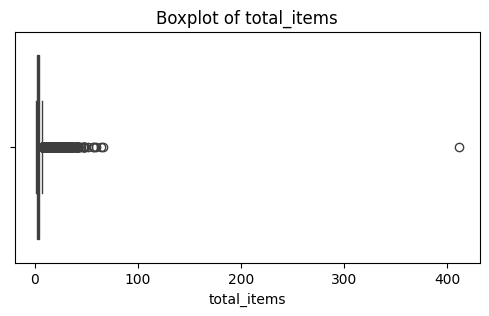

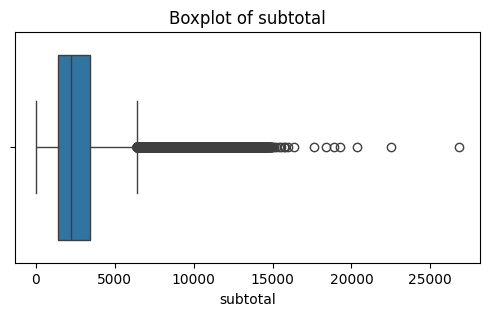

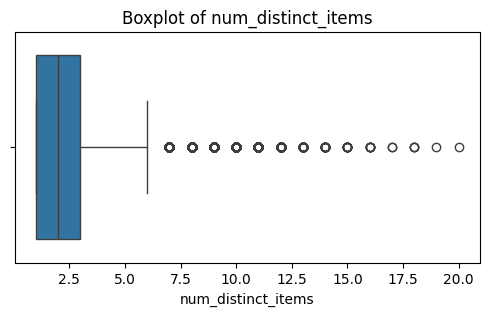

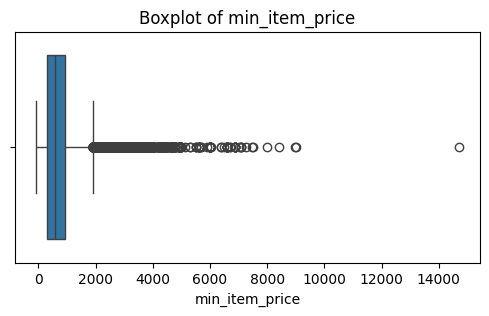

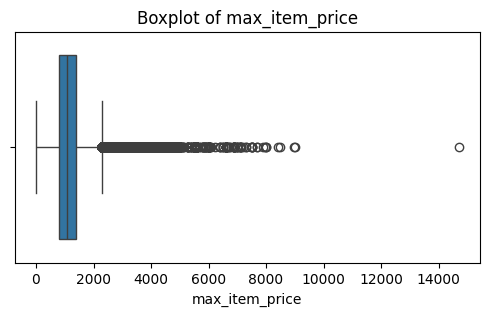

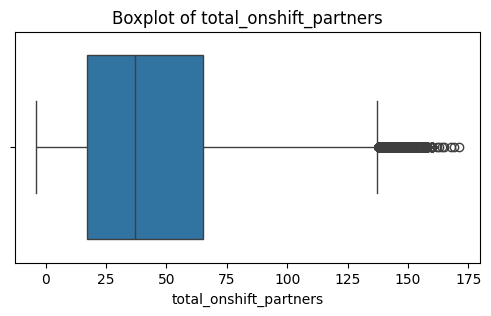

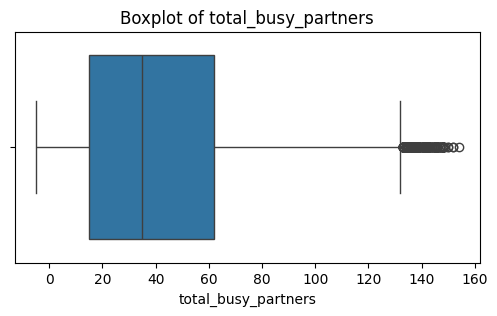

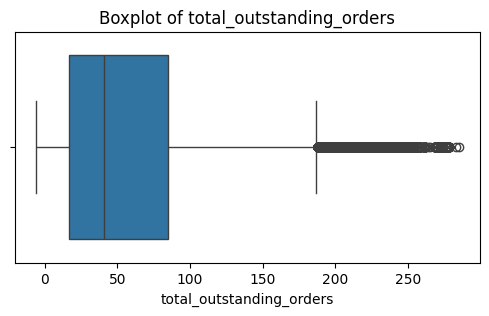

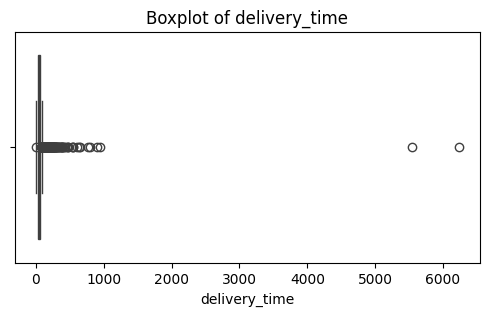

In [35]:
#checking the outliers
num_cols = ["total_items", "subtotal", "num_distinct_items", "min_item_price", "max_item_price", 
            "total_onshift_partners", "total_busy_partners", "total_outstanding_orders", "delivery_time"]

for col in num_cols:
    plt.figure(figsize=(6, 3))  # Create a new figure for each plot
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

There are outliers present in the numerical columns

In [36]:
#checking for anomaly (outliers)
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model1=LocalOutlierFactor()
#model1.fit(df)
df['lof_anomaly_score']=model1.fit_predict(df[num_cols])
df.lof_anomaly_score.value_counts()

lof_anomaly_score
 1    172739
-1      3509
Name: count, dtype: int64

In [37]:
#dropping the columns
df.drop(df[df['lof_anomaly_score']==-1].index,inplace=True)

In [38]:
df.shape

(172739, 19)

The outliers have been removed

# 🛠️ Model Building

In [39]:
#handling the outliers in the "delivery_time" column using capping method
p1 = np.percentile(df['delivery_time'], 1)
p99 = np.percentile(df['delivery_time'], 99)
median = df['delivery_time'].median()

In [40]:
df['delivery_time']=np.where(df['delivery_time'] < p1, median,np.where(df['delivery_time'] > p99, p99, df['delivery_time']))
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_hour,order_day_of_week,order_day_name,lof_anomaly_score
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4,Friday,1
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1,Tuesday,1
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0,Monday,1
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3,Thursday,1
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1,Tuesday,1


<Axes: xlabel='delivery_time', ylabel='Density'>

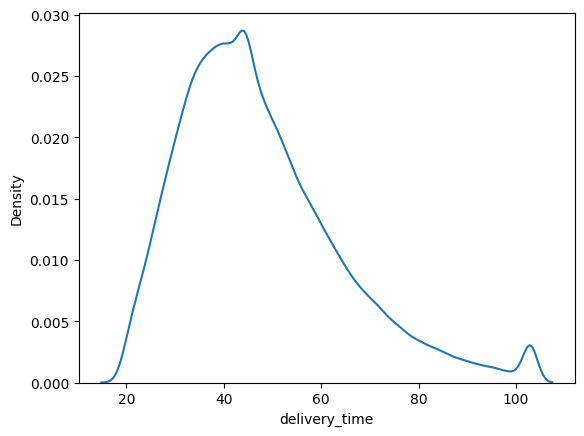

In [41]:
#let us see the distribution
sns.kdeplot(df['delivery_time'])


The distribution looks better for Model building

## Train Test Split

In [42]:
#let us encode the categorical columns like "market_id", "store_primarycategory" and "order_protocol"
df["order_protocol"] = df.order_protocol.astype("category").cat.codes
df["store_primary_category"] = df.store_primary_category.astype("category").cat.codes
df["market_id"] = df.market_id.astype("category").cat.codes

In [43]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_hour,order_day_of_week,order_day_name,lof_anomaly_score
0,0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,4,0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4,Friday,1
1,1,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,45,1,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1,Tuesday,1
8,1,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,35,2,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0,Monday,1
14,0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,37,0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3,Thursday,1
15,0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,37,0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1,Tuesday,1


In [44]:
#dropping the unwanted columns
df.drop(['order_day_name','created_at','actual_delivery_time', 'store_id'],axis=1,inplace=True)

In [45]:
#X and Y
X = df.drop("delivery_time", axis = 1)
y = df["delivery_time"]

In [46]:
X.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day_of_week',
       'lof_anomaly_score'],
      dtype='object')

In [47]:
y

0         62.983333
1         67.066667
8         26.433333
14        37.883333
15        49.800000
            ...    
197423    65.116667
197424    56.383333
197425    50.133333
197426    65.116667
197427    37.133333
Name: delivery_time, Length: 172739, dtype: float64

In [48]:
#train test split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print(f"The size of X train", X_train.shape)
print(f"The size of X test", x_test.shape)
print(f"The size of y train", y_train.shape)
print(f"The size of y test", y_test.shape)

The size of X train (138191, 14)
The size of X test (34548, 14)
The size of y train (138191,)
The size of y test (34548,)


In [50]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_hour,order_day_of_week,lof_anomaly_score
0,0,4,0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4,1
1,1,45,1,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1,1
8,1,35,2,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0,1
14,0,37,0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3,1
15,0,37,0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1,1


In [51]:
#scaling the values for better model building
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(x_test)

In [52]:
X_train_scaled

array([[-0.55792643, -0.60163305, -1.26428781, ..., -0.39879325,
        -1.58775028,  0.        ],
       [-0.55792643, -1.53597189, -1.26428781, ..., -0.9752129 ,
        -1.09671265,  0.        ],
       [ 0.94609034, -0.74916024,  0.05773963, ..., -0.62936111,
         0.86743787,  0.        ],
       ...,
       [-1.30993482,  0.08682715,  0.05773963, ..., -0.51407718,
         1.3584755 ,  0.        ],
       [ 0.94609034,  1.11951744,  1.37976706, ..., -0.74464504,
         0.37640024,  0.        ],
       [ 0.94609034, -0.40493014,  0.71875334, ...,  1.44574963,
        -0.11463739,  0.        ]])

In [53]:
X_test_scaled

array([[ 0.94609034,  1.75880191,  1.37976706, ..., -0.74464504,
         1.3584755 ,  0.        ],
       [-1.30993482, -0.40493014,  1.37976706, ..., -0.85992897,
        -0.11463739,  0.        ],
       [-0.55792643, -1.24091752, -1.26428781, ..., -0.62936111,
         1.3584755 ,  0.        ],
       ...,
       [-1.30993482,  1.562099  , -1.26428781, ...,  1.44574963,
         0.86743787,  0.        ],
       [ 0.94609034,  0.5294087 ,  0.05773963, ..., -0.39879325,
        -0.11463739,  0.        ],
       [ 0.19408195, -1.24091752, -0.60327409, ...,  1.09989784,
        -1.09671265,  0.        ]])

We have created the train and test data which can be used for model training and building

First let us use a classical model to get an initial understanding of the dataset and the underlying pattern.

We will use :
- ### Random Forest Classifier 
- ### XGBoostRegressor

In [63]:
#defining a functin to get the scores
def metrics_evals(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"MSE":mse,
            "RMSE":rmse,
            "MAE":mae,
            "R2":r2}

In [56]:
from sklearn.ensemble import RandomForestRegressor

#creating the instance
regressor = RandomForestRegressor()
regressor.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [57]:
prediction = regressor.predict(X_test_scaled)

In [59]:
prediction

array([46.5045    , 41.93266667, 66.52      , ..., 54.48133333,
       34.68483333, 38.12616667])

In [64]:
#evaluating the scores
eval = metrics_evals(y_test, prediction) 
eval

{'MSE': 198.65861942443328,
 'RMSE': 14.094630872230507,
 'MAE': 10.839310215600655,
 'R2': 0.28052980257367544}

In [66]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 325.1 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 544.7 kB/s eta 0:00:01
   ---------------------------------------  276.5/282.6 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.6 MB/s eta 0:00:00


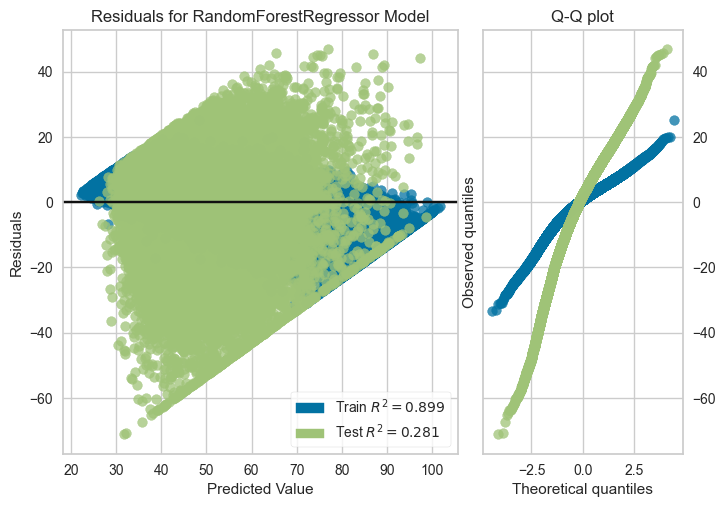

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [67]:
#evaluating the residuals
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regressor, hist=False, qqplot=True)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

**Insight**

- It is clear evident from the visualtion that it is not fitting the regression line.
- Model is overfitting
- We can try to introduce the regularizer.

In [69]:
#lets try XGBoost

from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators = 300,
                   n_jobs = -1,
                   random_state = 123)

xgb.fit(X_train_scaled, y_train,
        eval_set = [(X_test_scaled, y_test)], verbose=True)

[0]	validation_0-rmse:15.90787
[1]	validation_0-rmse:15.48495
[2]	validation_0-rmse:15.21632
[3]	validation_0-rmse:14.99433
[4]	validation_0-rmse:14.81564
[5]	validation_0-rmse:14.65416
[6]	validation_0-rmse:14.57201
[7]	validation_0-rmse:14.50471
[8]	validation_0-rmse:14.42706
[9]	validation_0-rmse:14.37099
[10]	validation_0-rmse:14.31453
[11]	validation_0-rmse:14.23033
[12]	validation_0-rmse:14.19286
[13]	validation_0-rmse:14.17342
[14]	validation_0-rmse:14.14419
[15]	validation_0-rmse:14.09381
[16]	validation_0-rmse:14.07169
[17]	validation_0-rmse:14.05648
[18]	validation_0-rmse:14.03396
[19]	validation_0-rmse:14.01535
[20]	validation_0-rmse:13.99311
[21]	validation_0-rmse:13.98063
[22]	validation_0-rmse:13.97292
[23]	validation_0-rmse:13.96395
[24]	validation_0-rmse:13.95274
[25]	validation_0-rmse:13.94619
[26]	validation_0-rmse:13.93203
[27]	validation_0-rmse:13.92515
[28]	validation_0-rmse:13.91835
[29]	validation_0-rmse:13.90077
[30]	validation_0-rmse:13.89675
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

In [70]:
#predictions
prediction = xgb.predict(X_test_scaled)

In [71]:
prediction

array([48.964348, 42.124207, 57.358616, ..., 57.658558, 34.279427,
       38.23902 ], dtype=float32)

In [72]:
#evaluating the results
eval = metrics_evals(y_test, prediction) 
eval

{'MSE': 191.73446596564912,
 'RMSE': 13.846821511294538,
 'MAE': 10.580505014769725,
 'R2': 0.30560660050187505}

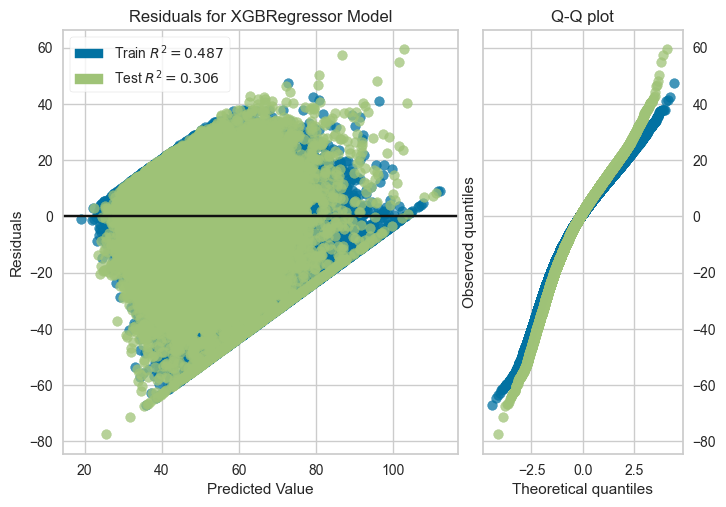

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [73]:
#visualizing the residuals
visualizer = ResidualsPlot(xgb, hist=False, qqplot=True)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

**Insights**
- Without any regularization and engineering, we observe we have very good fitted line.
- It captures more information than Random Forest
- R2 Score of train ~0.5 and test ~0.3 indicates slightly overfitted model.

### Let us create a Neural network model

In [75]:
!pip install keras
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/50.1 kB ? eta -:--:--
     --------------- ---------------------- 20.5/50.1 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 50.1/50.1 kB 632.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.3 MB 3.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 3.3 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.3 MB 4.3 MB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.3 MB 4.4 MB/s eta 0:00:01
   --------------------------------- ------ 1.1/1.3 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 4.0 MB/s eta 0:00:00
   -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [88]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

**Why use ModelCheckpoint?**

- Prevents loss of the best model during training.
- Useful when training for many epochs—only the best version is saved.
- Helps avoid overfitting by selecting the model with the best validation performance.

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense,BatchNormalization,Input,Dropout

In [91]:
np.random.seed(42)
tf.random.set_seed(42)
#defining a baseline model
def baseline_model():
  model=Sequential()
  model.add(Dense(512,activation='relu',kernel_initializer='glorot_uniform',input_shape=(14,),name='Hidden_Layer1'))
  model.add(Dense(256,activation='relu',kernel_initializer='glorot_uniform',name='Hidden_Layer2'))
  model.add(Dense(128,activation='relu',kernel_initializer='glorot_uniform',name='Hidden_Layer3'))
  model.add(Dense(64,activation='relu',kernel_initializer='glorot_uniform',name='Hidden_Layer4'))
  model.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform',name='Hidden_Layer5'))
  model.add(Dense(16,activation='relu',kernel_initializer='glorot_uniform',name='Hidden_Layer6'))
  model.add(Dense(1,name='Output_Layer'))
  return model

- A Sequential model is created, which means layers are added in a step-by-step manner.
- Adding the First Hidden Layer:
  - 512 neurons in the layer.
  - Uses ReLU (Rectified Linear Unit) activation function.
  - Glorot Uniform (Xavier) initialization is used for weight initialization.
  - Input shape of (16,) → The model expects 16 features as input.
- Adding the Second Hidden Layer:
  - 256 neurons with ReLU activation and Glorot Uniform initialization.
- Adding the Third Hidden Layer:
  - 128 neurons with ReLU activation and Glorot Uniform initialization.
- Adding the Fourth Hidden layer:
  - 64 neurons with ReLU activation.
- Adding the Fifth Hidden layer:
  - 32 neurons with ReLU activation.
- Adding the Sixth Hidden layer:
  - 16 neurons with ReLU activation.
- Adding the Output Layer:
  - A single neuron (since it's a regression task or binary classification).
  - No activation function (for regression) or can use sigmoid (for binary classification).

In [92]:
model1=baseline_model()

In [93]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)                │ (None, 512)                 │           7,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer4 (Dense)                │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer5 (Dense)                │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer6 (Dense)                │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,785 (714.00 KB)

 Trainable params: 182,785 (714.00 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
#importing Adam moptimizer
from keras.src.optimizers import Adam

#initializing the optimizer
adam=Adam(learning_rate=0.01)

#compiling the model
model1.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])

#training the model
history=model1.fit(X_train_scaled,y_train,epochs=100,batch_size=512,verbose=1, validation_split=0.2 ,
                  callbacks=[create_model_checkpoint(model_name="model_1.keras")])

Epoch 1/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 642.8489 - mae: 18.6578 - mse: 642.8489 - val_loss: 219.6789 - val_mae: 11.5575 - val_mse: 219.6789
Epoch 2/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 216.2643 - mae: 11.3137 - mse: 216.2643 - val_loss: 213.7150 - val_mae: 11.2856 - val_mse: 213.7150
Epoch 3/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 213.2982 - mae: 11.2436 - mse: 213.2982 - val_loss: 211.1341 - val_mae: 11.1230 - val_mse: 211.1341
Epoch 4/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 212.1235 - mae: 11.2080 - mse: 212.1235 - val_loss: 212.2784 - val_mae: 11.0242 - val_mse: 212.2784
Epoch 5/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 211.6607 - mae: 11.1932 - mse: 211.6607 - val_loss: 210.5184 - val_mae: 11.0060 - val_mse: 210.5184
Epoch 6/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 210.8341 - mae: 11.1716 - mse: 210.8341 - val_loss: 208.8098 - val_mae: 10.9875 - val_mse: 208.8098
Epoch 7/100
216/216 ━━━━━━━

#### Compiling the model means defining:

- Loss function: 'mse' (Mean Squared Error) → Measures how far predictions are from actual values.
- Optimizer: adam → Helps adjust model weights to minimize loss.

Metrics:
- 'mse' (Mean Squared Error) → Average squared difference between predictions and actual values.
- 'mae' (Mean Absolute Error) → Average absolute difference between predictions and actual values.

#### Training the model
- Fits (trains) the model using the training data (X_train_scaled, y_train).
- Training parameters:
    - epochs=100 → Train the model for 100 iterations over the dataset.
    - batch_size=512 → Process 512 samples at a time before updating weights.
    - verbose=1 → Show training progress (loss, validation loss).
    - validation_split=0.2 → 20% of training data is used for validation (not used for training).
    - callbacks=[create_model_checkpoint(model_name="model_1.keras")]
        - Saves the best version of the model during training.
        - Prevents losing the best weights due to overfitting.

In [95]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [97]:
epochs = history.epoch
loss = history.history["loss"]
train_accuracy=history.history["mse"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_mse"]

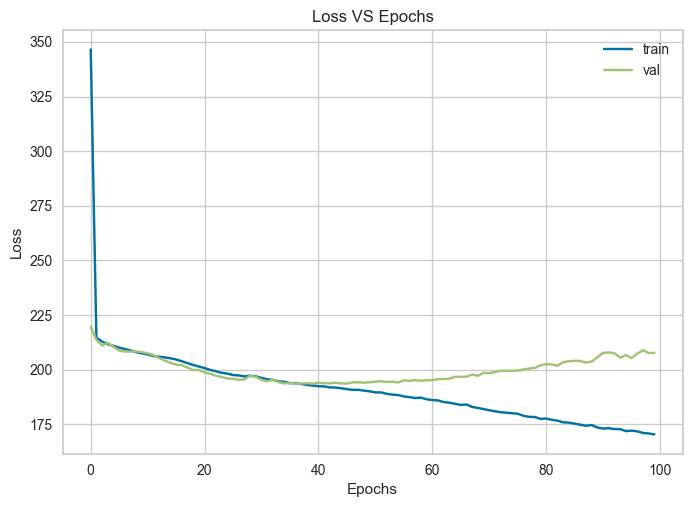

In [105]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

In [107]:
prediction = model1.predict(X_test_scaled)

1080/1080 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [108]:
eval = metrics_evals(y_test, prediction)
eval

{'MSE': 210.91017171328525,
 'RMSE': 14.522746700031824,
 'MAE': 11.027223392664858,
 'R2': 0.23615907871795971}

In [110]:
prediction_train = model1.predict(X_train_scaled)

4319/4319 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step


In [111]:
evaluation = metrics_evals(y_train,prediction_train)
evaluation

{'MSE': 180.2724512177147,
 'RMSE': 13.426557683103837,
 'MAE': 10.279606205824859,
 'R2': 0.3390403617477842}

In [113]:
model1.evaluate(X_test_scaled,y_test)

1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 212.3919 - mae: 11.0949 - mse: 212.3919


[210.91006469726562, 210.91006469726562, 11.027216911315918]

**Insights**
- It is clear evident from the graph, as the number of epochs increases model tends to perform better

Let us try another architecture

In [124]:
def baseline_model2():

  model = Sequential()
  # Input layer
  model.add(Input(shape=(14,)))

  # Hidden layers with BatchNormalization
  hidden_units = [512, 256, 256, 128, 64, 32, 16]  # Number of neurons in each hidden layer
  for i, units in enumerate(hidden_units):
      model.add(Dense(units, activation='relu', kernel_initializer='glorot_uniform', name=f'Hidden_Layer{i+1}'))
      model.add(BatchNormalization())

    # Output layer
  model.add(Dense(1, name='Output_Layer'))  # No activation for regression

  return model

In [125]:
model2 = baseline_model2()

In [126]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)                │ (None, 512)                 │           7,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer4 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer5 (Dense)                │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer6 (Dense)                │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer7 (Dense)                │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253,633 (990.75 KB)

 Trainable params: 251,105 (980.88 KB)

 Non-trainable params: 2,528 (9.88 KB)

In [127]:
#initializing
adam=Adam(learning_rate=0.01)

#compiling the model
model2.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])

#training the model
history=model2.fit(X_train_scaled,y_train,epochs=50,batch_size=512,verbose=1 ,callbacks=[create_model_checkpoint(model_name="model_2.keras")])

Epoch 1/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - loss: 1460.1312 - mae: 32.6313 - mse: 1460.1312
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 209.2866 - mae: 11.1157 - mse: 209.2866
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 206.7145 - mae: 11.0415 - mse: 206.7145
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 203.0365 - mae: 10.9400 - mse: 203.0365
Epoch 5/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 200.9177 - mae: 10.8723 - mse: 200.9177
Epoch 6/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 199.4772 - mae: 10.8352 - mse: 199.4772
Epoch 7/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 198.4524 - mae: 10.8066 - mse: 198.4524
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 197.3311 - mae: 10.7746 - mse: 197.3311
Epoch 9/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 196.3043 - mae: 10.7464 - mse: 196.3043
Epoch 10/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 195.2209 - mae: 10.7

In [128]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse'])

In [129]:
prediction = model2.predict(X_test_scaled)

1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


In [130]:
eval = metrics_evals(y_test, prediction)
eval

{'MSE': 220.37525694365908,
 'RMSE': 14.845041493497385,
 'MAE': 11.268613551509619,
 'R2': 0.20187993815469596}

In [137]:
model2.evaluate(X_test_scaled,y_test)

1080/1080 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 220.3872 - mae: 11.2996 - mse: 220.3872


[220.37513732910156, 220.37513732910156, 11.26861572265625]

- There is not much improvements seen with the new model
-  We can rely on the model1. 

In [139]:
#saving the model using pickle
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(model1, file)

# Leading Questions

1. Defining the problem statements and where can this and modifications of this be used?
    - Delivery time estimation for the orders, we can use this case with some modification in the **Estimate Cab Arrival Time**.

2. List 3 functions the pandas datetime provides with one line explanation.
    - pd.to_datetime(): Converts a date string or a numeric timestamp into a pandas Datetime object.

    - .dt accessor: Allows vectorized access to attributes like year, month, day, hour, etc., from a Datetime column in a pandas DataFrame.

    - pd.date_range(): Generates a sequence of Datetime objects at specified frequency, such as daily, monthly, or hourly intervals.

3. Short note on datetime, timedelta, time span (period)
    - Datetime
        - A datetime represents a specific point in time, including both the date and the time of day.

    - Timedelta
        - A timedelta represents the difference between two datetime objects, typically expressed in days, seconds, and microseconds.

    - Time Span (Period)
        - A Period represents a time span or interval of time, such as a specific month, quarter, or year.

4. Why do we need to check for outliers in our data?
    - Checking for outliers is a critical step in data preprocessing that helps ensure the reliability of statistical analysis, improves model  performance, maintains data quality, and sometimes uncovers important insights.

5. Name 3 outlier removal methods?
    - Z-Score Method
    - IQR Method
    - LOF Method

6. What classical machine learning methods can we use for this problem?
    - Random Forest
    - XGBoost
    - Linear Regression

7. Why is scaling required for neural networks?
    - Convergence Speed
    - Numerical Stability
    - Improving weight initialization

8. Briefly explain your choice of optimizer.
    - We are using ADAM because of the following reason
      - Moment Estimation: Computes estimates of the first moment (mean) and second moment (uncentered variance) of the gradients.
      - Bias Correction: Applies bias correction to the moment estimates to counteract their initialization bias.
      - Parameter Update: Updates parameters using these corrected moment estimates, adjusted by learning rates.

9. Which activation function did you use and why?
    - We are using RELU because of the following reasons:
      - Mitigating vanishing gradients
      - Sparse Activation
      - Avoid exploding gradients

10. Why does a neural network perform well on a large dataset?
    - Neural networks perform well on large datasets because they provide diverse, representative, and sufficient data that helps in learning complex patterns, reducing overfitting, and improving generalization. The increased volume of data supports the training of more sophisticated models and enhances their ability to make accurate predictions.
